In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt

In [45]:
def linear(x):
    return x       # f(x) = x

def derLinear(x):
    return np.ones_like(x)    # f'(x) = 1

def relu(x):
    return np.maximum(0, x)     # f(x) = max(0, x)   0 if x <= 0 else x

def derRelu(x):
    x = np.where(x <= 0, 0, 1)    # swap x <= 0 for 0 and x > 0 for 1
    return np.maximum(0, x)

def softmax(x):     # exp(x_i) / sum(exp(x_j)) , j = 0, 1, 2, ...
    try: # try to 
        exp = np.exp(x)
    except:
        return 0
    return exp / np.sum(exp, axis = 1, keepdims = True)

def derSoftmax(x, y_oh):
    y_pred = softmax(x)
    k = np.nonzero(y_pred * y_oh)
    pk = y_pred[k]
    y_pred[k] = pk * (1 - pk)
    return y_pred

def negLogLikelihood(y_oh, y_pred):
    k = np.nonzero(y_pred * y_oh)
    pk = y_pred[k]
    return np.mean(-np.log(pk))

def derNegLogLikelihood(y_oh, y_pred):
    k = np.nonzero(y_pred * y_oh)
    pk = y_pred[k]
    y_pred[k] = -(1.0 / pk)
    return y_pred

def softmaxNegLogLikelihood(y_oh, y_pred):
    y_softmax = softmax(y_pred)
    return negLogLikelihood(y_oh, y_softmax)

def derSoftmaxNegLogLikelihood(y_oh, y_pred):
    k = np.nonzero(y_pred * y_oh)
    dlog = derNegLogLikelihood(y_oh, y_softmax)
    dsoft = derSoftmax(y_pred, y_oh)
    y_softmax[k] = dlog[k] * dsoft[k]
    return y_softmax / y_softmax.shape[0]

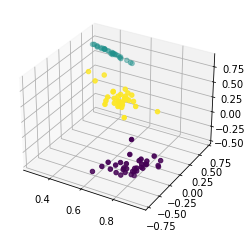

In [46]:
X, Y = make_blobs(n_samples=100, centers=3, n_features=3)

transformer = Normalizer().fit(X)
X = transformer.transform(X)

results = []
for i in Y:
    if i == 0:
        results.append([1, 0, 0])
    elif i == 1:
        results.append([0, 1, 0])
    else:
        results.append([0, 0, 1])
results = np.array(results)

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c = Y)


In [47]:
w1 = np.random.rand(3, 3)
b1 = np.ones((1, 3))
w2 = np.random.rand(3, 3)
b2 = np.ones((1, 3))
w3 = np.random.rand(3, 3)
b3 = np.ones((1, 3))
learning_rate = 0.01

Text(0.5, 1.0, 'cost')

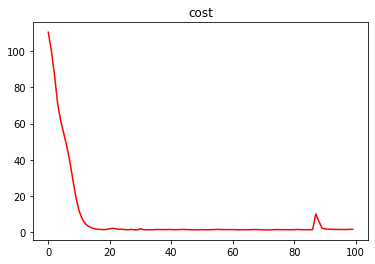

In [48]:
costs = []
cost = 1
for i in range(100):
    summ = 0
    for iteration in range(len(X)):
        '''FEEDFOWARD''' 
        x = X[iteration].reshape(1, 3)
        y = results[iteration]
        # first layer
        h1Input = np.dot(x, w1.T) + b1                      # 1
        h1 = linear(h1Input)                                # 2

        # second layer
        h2Input = np.dot(h1, w2.T) + b2                     # 3
        h2 = relu(h2Input)                                  # 4

        # output layer
        oInput = np.dot(h2, w3.T) + b3                      # 5
        o = linear(oInput)                                  # 6

        # cost calculating
        cost = softmaxNegLogLikelihood(y, o)                # 7

        
        '''BACKPROPAGATION'''
        do = derNegLogLikelihood(y, o)                      # 7'

        doInput = derLinear(oInput) * do                    # 6'

        dh2 = np.dot(doInput, w3)                           # 5'
        dw3 = np.dot(doInput.T, h2)                         # 5'
        db3 = 1.0 * doInput.sum(axis = 0, keepdims = True)  # 5'

        dh2Input = derRelu(h2Input) * dh2                   # 4'

        dh1 = np.dot(dh2Input, w2)                          # 3'
        dw2 = np.dot(dh2Input.T, h1)                        # 3'
        db2 = 1.0 * dh2Input.sum(axis = 0, keepdims = True) # 3'

        dh1Input = derLinear(h1Input) * dh1                 # 2'

        dx = np.dot(dh1Input, w1)                           # 1'
        dw1 = np.dot(dh1Input.T, x)                         # 1'
        db1 = 1.0 * dh1Input.sum(axis = 0, keepdims = True) # 1'

        # updating the weights
        w1 = w1 - learning_rate * dw1
        w2 = w2 - learning_rate * dw2
        w3 = w3 - learning_rate * dw3
        
        b1 = b1 - learning_rate * db1
        b2 = b2 - learning_rate * db2
        b3 = b1 - learning_rate * db3
        
        summ += cost
    costs.append(summ)
    
plt.plot(costs, c = 'r')
plt.title('cost')

In [49]:
predict = []
for value in range(len(X)):
    h1Input = np.dot(X[value], w1.T) + b1                   
    h1 = linear(h1Input)                              
    h2Input = np.dot(h1, w2.T) + b2                     
    h2 = relu(h2Input)                                  
    oInput = np.dot(h2, w3.T) + b3                     
    o = linear(oInput)  
    
    predict.append(list(softmax(o).round()[0]))

In [50]:
acc = 0
for i in range(len(X)):
    a = (predict == results)[i]
    if a[0] and a[1] and a[2]:
        acc += 1
print('acc:', acc/len(X))
print('final cost:', cost)

acc: 1.0
final cost: 0.0
